In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [175]:
from scipy.stats import mannwhitneyu as mwu

Size of gene sets.

In [238]:
gene_set_sizes=None
for dname in ['dorothea_AB','dorothea_ABC','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

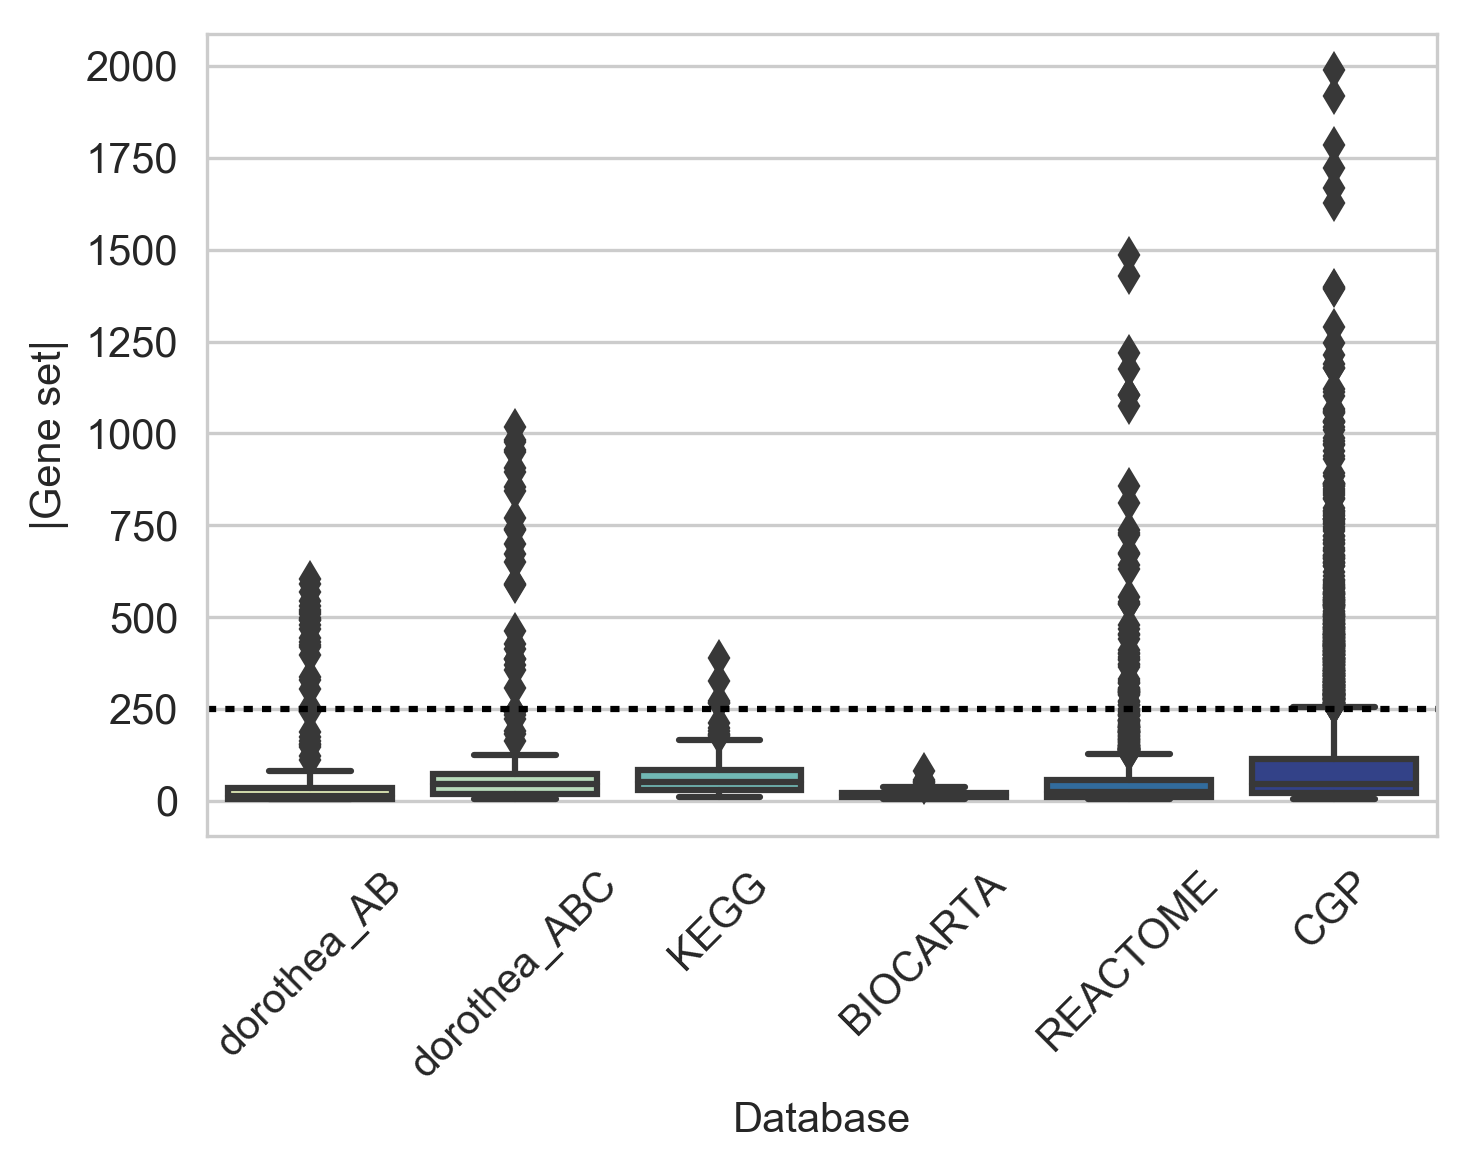

In [246]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(rotation=45)
plt.tight_layout()

Gene set similarity distribution

In [240]:
dname1='dorothea_AB'
metric='overlap'

In [241]:
similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
    #readl
    data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                     sep=',',header=0,index_col=0)
    data=data.max(1).values
    max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
    max_sim1['Database']=dname2
    max_sim1['Similarity']=data
    max_sim1['Random']='Real'
    similarities=pd.concat([similarities,max_sim1])
    #random
    data=pd.read_csv('../results/similarity/%s_filtered_%s_random_0_%s.csv' % (dname1,dname2,metric),
                     sep=',',header=0,index_col=0)
    data=data.max(1).values
    max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
    max_sim2['Database']=dname2
    max_sim2['Similarity']=data
    max_sim2['Random']='Random'
    similarities=pd.concat([similarities,max_sim2])
    
    print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    

dorothea_AB KEGG MannwhitneyuResult(statistic=10350.0, pvalue=0.00027772300119038515)
dorothea_AB BIOCARTA MannwhitneyuResult(statistic=12353.5, pvalue=0.13511116937667705)
dorothea_AB REACTOME MannwhitneyuResult(statistic=4031.5, pvalue=1.3379603424694502e-28)
dorothea_AB CGP MannwhitneyuResult(statistic=1714.0, pvalue=1.3489106105048865e-42)


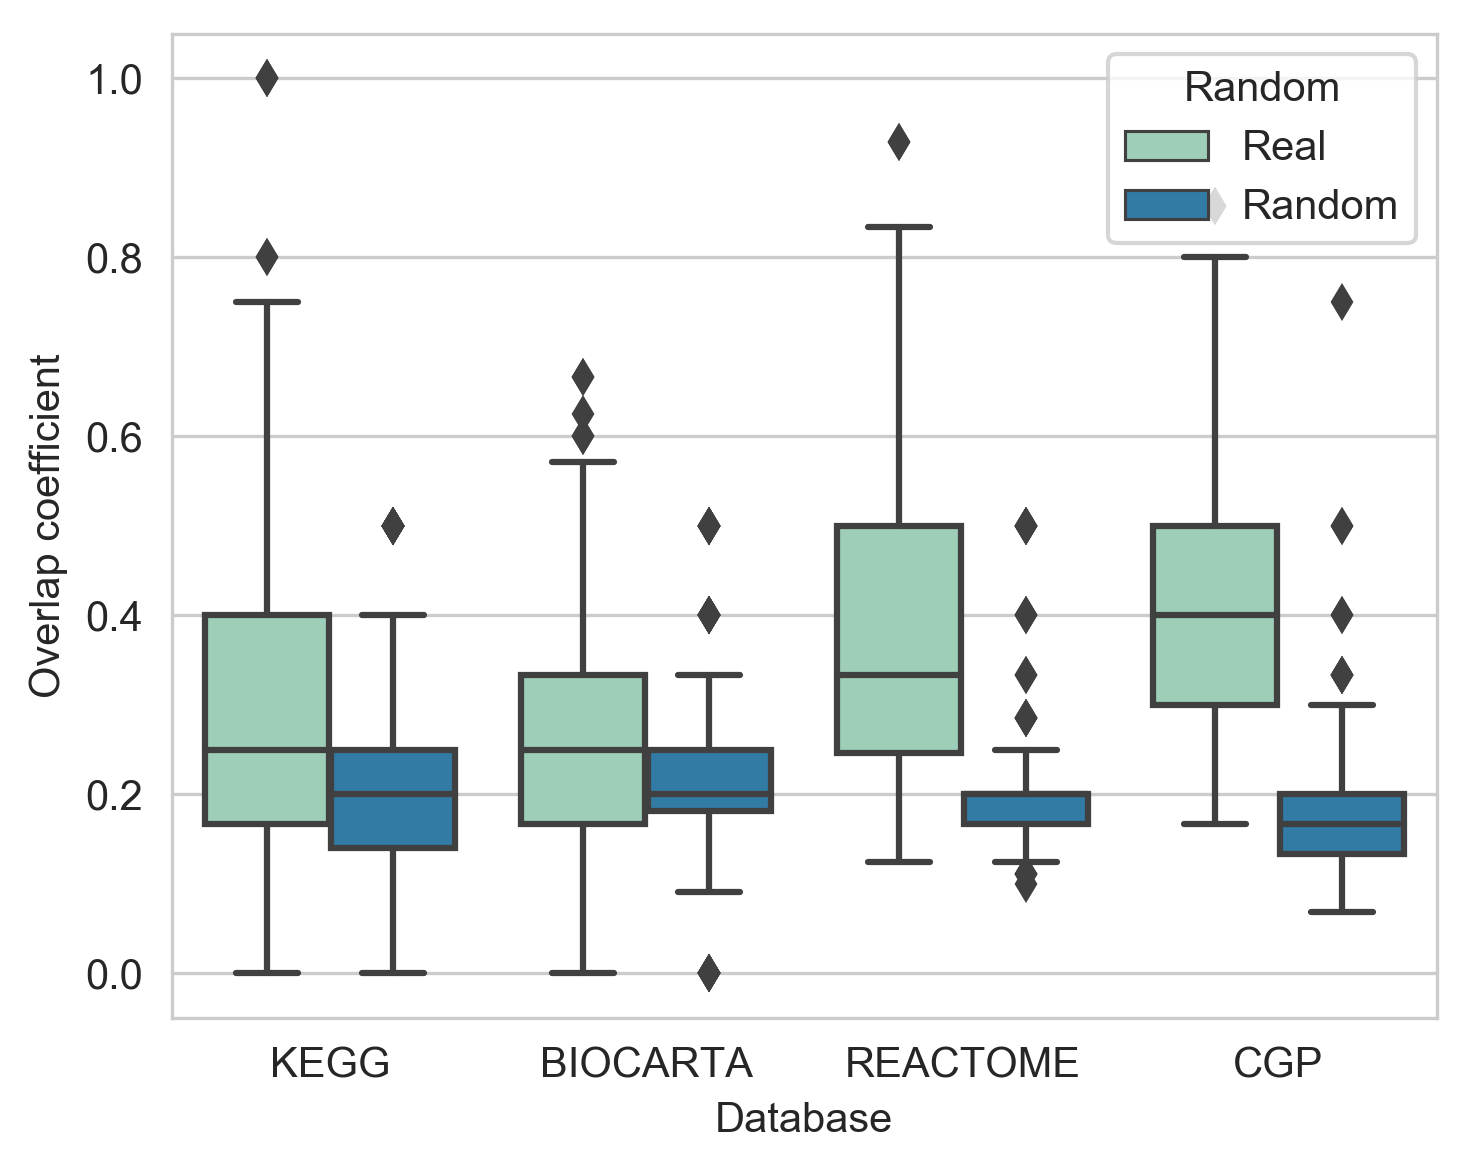

In [245]:
sns.set_palette('YlGnBu',2)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
if metric=='jaccard':
    plt.ylabel('Jaccard index')
else:
    plt.ylabel('Overlap coefficient')
plt.tight_layout()

In [207]:
data

array([0.04545455, 0.02469136, 0.01847575, 0.04      , 0.03125   ,
       0.025     , 0.03448276, 0.01960784, 0.03333333, 0.03278689,
       0.0234375 , 0.02366864, 0.02898551, 0.01941748, 0.05      ,
       0.04166667, 0.01834862, 0.02150538, 0.01851852, 0.02083333,
       0.03539823, 0.03174603, 0.04      , 0.02173913, 0.01886792,
       0.0173913 , 0.01986755, 0.05882353, 0.02941176, 0.03389831,
       0.01945525, 0.03703704, 0.03448276, 0.0212766 , 0.03125   ,
       0.02020202, 0.03448276, 0.07142857, 0.03225806, 0.02469136,
       0.04      , 0.05555556, 0.04761905, 0.01980198, 0.03225806,
       0.02469136, 0.02941176, 0.02777778, 0.03296703, 0.03125   ,
       0.02583026, 0.03703704, 0.03448276, 0.02030457, 0.025     ,
       0.01724138, 0.02597403, 0.03030303, 0.04545455, 0.01851852,
       0.04      , 0.02013423, 0.01818182, 0.02205882, 0.01886792,
       0.03636364, 0.03703704, 0.02857143, 0.02702703, 0.01863354,
       0.01818182, 0.02884615, 0.04166667, 0.04347826, 0.01886